In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier 

In [3]:
data=sns.load_dataset("iris")
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

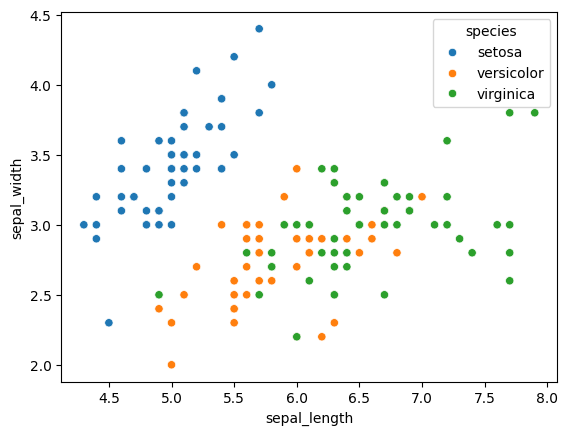

In [4]:
sns.scatterplot(data=data,x="sepal_length",y="sepal_width",hue="species")

In [5]:

X=data.drop('species',axis=1)
Y=data["species"]

In [6]:
%%time

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=42,test_size=0.20)
# Train Decision tree model

model=DecisionTreeClassifier().fit(X_train,Y_train)
Y_perd=model.predict(X_test)

print("classification_report\n",classification_report(Y_test,Y_perd))
print("accuracy_score\n",accuracy_score(Y_test,Y_perd))
print("confusion_matrix\n",confusion_matrix(Y_test,Y_perd))


classification_report
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy_score
 1.0
confusion_matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: total: 0 ns
Wall time: 26.7 ms


In [7]:
%%time

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=42,test_size=0.20)
# Train Decision tree model

model=RandomForestClassifier().fit(X_train,Y_train)
Y_perd=model.predict(X_test)

print("classification_report\n",classification_report(Y_test,Y_perd))
print("accuracy_score\n",accuracy_score(Y_test,Y_perd))
print("confusion_matrix\n",confusion_matrix(Y_test,Y_perd))


classification_report
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy_score
 1.0
confusion_matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: total: 391 ms
Wall time: 1.23 s


In [8]:
%%time

X=data.drop('species',axis=1)
Y=data["species"]

Y=LabelEncoder().fit_transform(Y)


X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=42,test_size=0.20)
# Train Decision tree model

model=XGBClassifier().fit(X_train,Y_train)
Y_perd=model.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

print("precision_score\n",precision_score(Y_test,Y_perd,average='micro'))
print("accuracy_score\n",accuracy_score(Y_test,Y_perd))
print("recall_score\n",recall_score(Y_test,Y_perd,average='micro'))
print("f1_score",f1_score(Y_test,Y_perd,average='micro'))


precision_score
 1.0
accuracy_score
 1.0
recall_score
 1.0
f1_score 1.0
CPU times: total: 203 ms
Wall time: 294 ms


Text(0.5, 1.0, 'XGBoost')

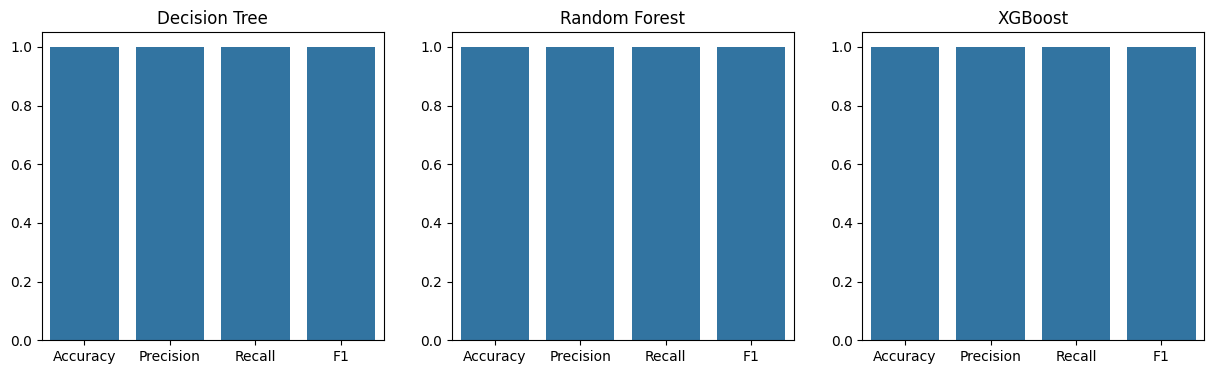

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Decision Tree
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'],y=[accuracy_score(Y_test, Y_perd),
               precision_score(Y_test, Y_perd, average='micro'),
               recall_score(Y_test, Y_perd, average='micro'),
               f1_score(Y_test, Y_perd, average='micro')],
            ax=axes[0])
axes[0].set_title('Decision Tree')

# Random Forest
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'],y=[accuracy_score(Y_test, Y_perd),
               precision_score(Y_test, Y_perd, average='micro'),
               recall_score(Y_test, Y_perd, average='micro'),
               f1_score(Y_test, Y_perd, average='micro')],
            ax=axes[1])
axes[1].set_title('Random Forest')

# XGBoost
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'],y=[accuracy_score(Y_test, Y_perd),
               precision_score(Y_test, Y_perd, average='micro'),
               recall_score(Y_test, Y_perd, average='micro'),
               f1_score(Y_test, Y_perd, average='micro')],
            ax=axes[2])
axes[2].set_title('XGBoost')
